In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,f1_score

In [103]:
data= pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [104]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [105]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [106]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [107]:
data = data.drop(data[['Serial No.']],axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [108]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [109]:
data.columns = data.columns.str.strip()

In [110]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.85)
data['Chance of Admit'] = bi.fit_transform(data[['Chance of Admit']])

In [111]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.207500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.406024
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


<Axes: xlabel='Chance of Admit', ylabel='GRE Score'>

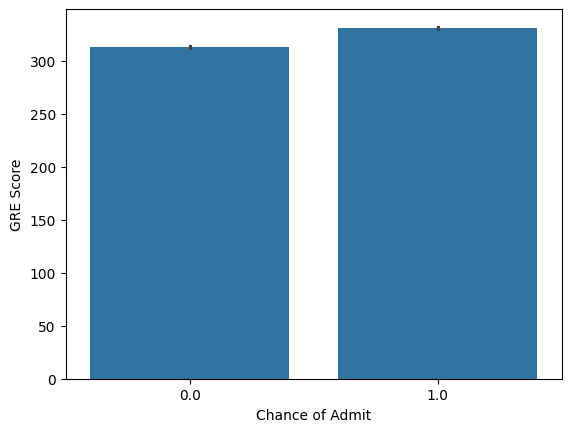

In [112]:
sns.barplot(data=data,x=data['Chance of Admit'],y=data['GRE Score'])

<Axes: xlabel='Chance of Admit', ylabel='TOEFL Score'>

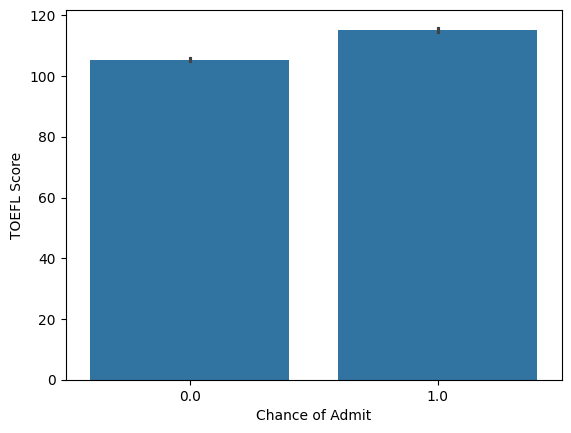

In [113]:
sns.barplot(data=data,x=data['Chance of Admit'],y=data['TOEFL Score'])

In [114]:
X = data.drop('Chance of Admit', axis = 1)
Y = data['Chance of Admit']

In [115]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,0.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.0
396,325,107,3,3.0,3.5,9.11,1,0.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,0.0


In [116]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [117]:
Y

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42 )

In [119]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [120]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (320, 7)
Y_train shape: (320,)
X_test shape: (80,)
Y_test shape: (80,)


In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score, classification_report

In [122]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [123]:
Y_pred = classifier.predict(X_train)


In [124]:
confusion_matrix(Y_train,Y_pred)

array([[258,   0],
       [  0,  62]], dtype=int64)

In [125]:
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       258
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



[Text(0.6166666666666667, 0.9375, 'x[5] <= 9.15\ngini = 0.312\nsamples = 320\nvalue = [258, 62]'),
 Text(0.43333333333333335, 0.8125, 'x[1] <= 116.5\ngini = 0.08\nsamples = 265\nvalue = [254, 11]'),
 Text(0.525, 0.875, 'True  '),
 Text(0.36666666666666664, 0.6875, 'x[2] <= 4.5\ngini = 0.052\nsamples = 261\nvalue = [254, 7]'),
 Text(0.2, 0.5625, 'x[5] <= 8.965\ngini = 0.016\nsamples = 248\nvalue = [246, 2]'),
 Text(0.13333333333333333, 0.4375, 'gini = 0.0\nsamples = 220\nvalue = [220, 0]'),
 Text(0.26666666666666666, 0.4375, 'x[5] <= 8.985\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.13333333333333333, 0.3125, 'x[4] <= 3.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3125, 'x[1] <= 112.5\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.3333333333333333, 0.1875, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.46

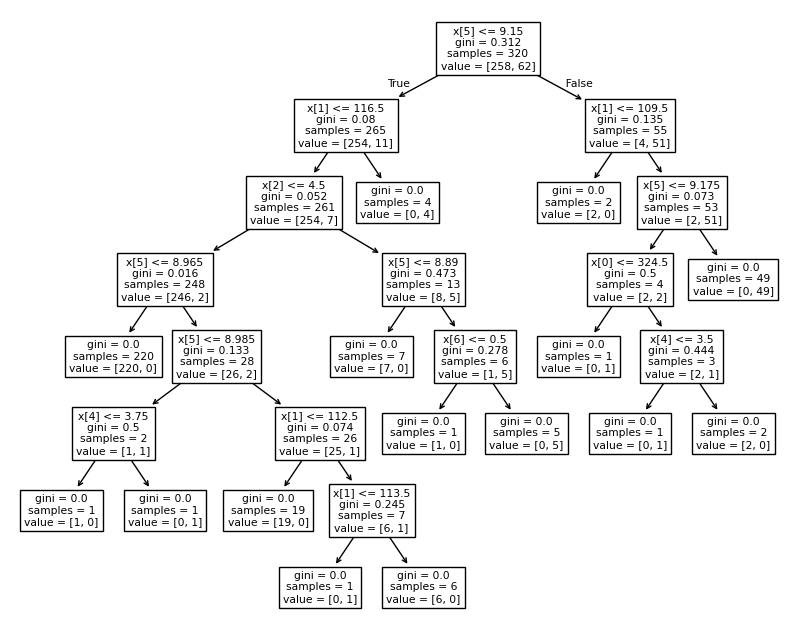

In [126]:
plt.figure(figsize=(10, 8))
tree.plot_tree(classifier)

In [127]:
ac=accuracy_score(Y_train,Y_pred)

In [128]:
f1=f1_score(Y_train,Y_pred)

In [129]:
pre=precision_score(Y_train,Y_pred)


In [130]:
recall=recall_score(Y_train,Y_pred)


In [131]:
print("accuracy_score:", ac)
print("f1_score:", f1)
print("precision_score:", pre)
print("recall_score:", recall)

accuracy_score: 1.0
f1_score: 1.0
precision_score: 1.0
recall_score: 1.0


In [132]:
Y_test

209    0.0
280    0.0
33     1.0
210    0.0
93     0.0
      ... 
246    0.0
227    0.0
369    0.0
176    1.0
289    0.0
Name: Chance of Admit, Length: 80, dtype: float64

In [133]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)

Y_test shape: (80,)
Y_pred shape: (320,)


In [134]:
Y_pred1 = classifier.predict(X_test)

In [135]:
confusion_matrix(Y_test,Y_pred1)

array([[57,  2],
       [ 2, 19]], dtype=int64)

In [136]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred1.shape)

Y_test shape: (80,)
Y_pred shape: (80,)


In [137]:
ac_test=accuracy_score(Y_test,Y_pred1)

In [138]:
f1_test=f1_score(Y_test,Y_pred1)

In [139]:
pre_test=precision_score(Y_test,Y_pred1)


In [140]:
recall_test=recall_score(Y_test,Y_pred1)


In [141]:
print("accuracy_score:", ac_test)
print("f1_score:", f1_test)
print("precision_score:", pre_test)
print("recall_score:", recall_test)


accuracy_score: 0.95
f1_score: 0.9047619047619048
precision_score: 0.9047619047619048
recall_score: 0.9047619047619048


In [142]:
classifier1 = DecisionTreeClassifier(criterion= 'entropy')
classifier1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [143]:
Y_pred2 = classifier1.predict(X_train)


In [144]:
confusion_matrix(Y_train,Y_pred2)

array([[258,   0],
       [  0,  62]], dtype=int64)

[Text(0.6666666666666666, 0.95, 'x[5] <= 9.185\nentropy = 0.709\nsamples = 320\nvalue = [258, 62]'),
 Text(0.5, 0.85, 'x[5] <= 8.93\nentropy = 0.293\nsamples = 271\nvalue = [257, 14]'),
 Text(0.5833333333333333, 0.8999999999999999, 'True  '),
 Text(0.4166666666666667, 0.75, 'entropy = 0.0\nsamples = 225\nvalue = [225, 0]'),
 Text(0.5833333333333334, 0.75, 'x[2] <= 4.5\nentropy = 0.887\nsamples = 46\nvalue = [32, 14]'),
 Text(0.4166666666666667, 0.65, 'x[1] <= 116.5\nentropy = 0.689\nsamples = 38\nvalue = [31, 7]'),
 Text(0.3333333333333333, 0.55, 'x[0] <= 328.5\nentropy = 0.513\nsamples = 35\nvalue = [31, 4]'),
 Text(0.16666666666666666, 0.45, 'x[4] <= 3.75\nentropy = 0.337\nsamples = 32\nvalue = [30, 2]'),
 Text(0.08333333333333333, 0.35, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.25, 0.35, 'x[5] <= 8.985\nentropy = 0.523\nsamples = 17\nvalue = [15, 2]'),
 Text(0.16666666666666666, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.25, 'x[1]

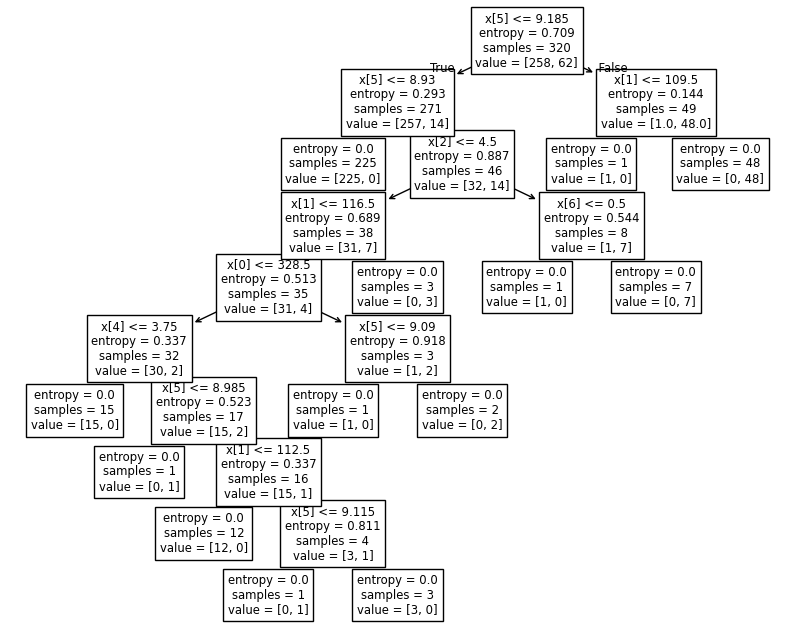

In [145]:
plt.figure(figsize=(10, 8))
tree.plot_tree(classifier1)

In [146]:
accuracy_score(Y_train,Y_pred2)

1.0

In [147]:
f1_score(Y_train,Y_pred2)

1.0

In [148]:
precision_score(Y_train,Y_pred2)

1.0

In [149]:
recall_score(Y_train,Y_pred2)

1.0

In [150]:
Y_pred3 = classifier1.predict(X_test)


In [151]:
confusion_matrix(Y_test,Y_pred3)

array([[57,  2],
       [ 1, 20]], dtype=int64)

In [152]:
accuracy_score(Y_test,Y_pred3)

0.9625

In [153]:
f1_score(Y_test,Y_pred3)

0.9302325581395349

In [154]:
precision_score(Y_test,Y_pred3)

0.9090909090909091

In [155]:
recall_score(Y_test,Y_pred3)

0.9523809523809523

In [156]:
classifier2 = DecisionTreeClassifier(criterion= 'gini')
classifier2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [157]:
Y_pred4 = classifier2.predict(X_train)
confusion_matrix(Y_train,Y_pred4)

array([[258,   0],
       [  0,  62]], dtype=int64)

[Text(0.6166666666666667, 0.9375, 'x[5] <= 9.15\ngini = 0.312\nsamples = 320\nvalue = [258, 62]'),
 Text(0.43333333333333335, 0.8125, 'x[1] <= 116.5\ngini = 0.08\nsamples = 265\nvalue = [254, 11]'),
 Text(0.525, 0.875, 'True  '),
 Text(0.36666666666666664, 0.6875, 'x[2] <= 4.5\ngini = 0.052\nsamples = 261\nvalue = [254, 7]'),
 Text(0.2, 0.5625, 'x[5] <= 8.965\ngini = 0.016\nsamples = 248\nvalue = [246, 2]'),
 Text(0.13333333333333333, 0.4375, 'gini = 0.0\nsamples = 220\nvalue = [220, 0]'),
 Text(0.26666666666666666, 0.4375, 'x[5] <= 8.985\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.13333333333333333, 0.3125, 'x[4] <= 3.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3125, 'x[1] <= 112.5\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.3333333333333333, 0.1875, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.46

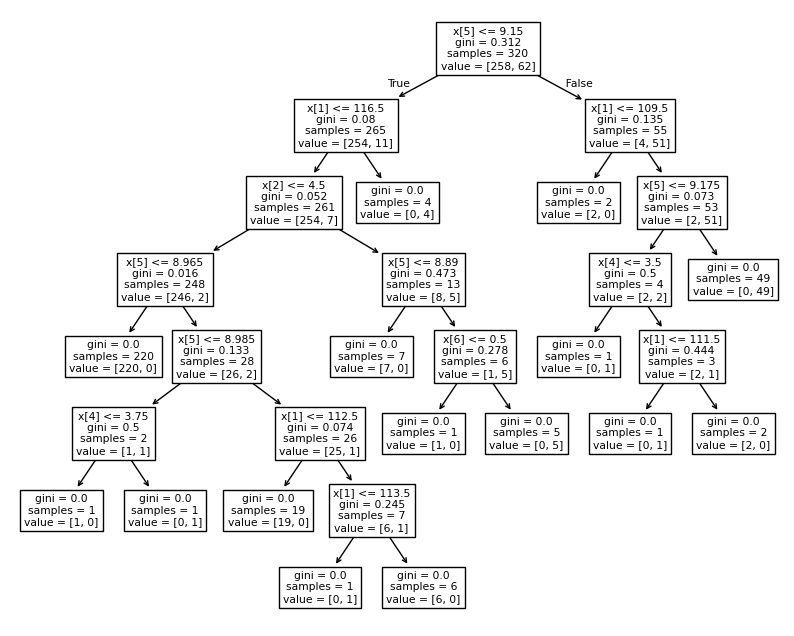

In [158]:
plt.figure(figsize=(10, 8))
tree.plot_tree(classifier2)

In [159]:
accuracy_score(Y_train,Y_pred4)

1.0

In [160]:
f1_score(Y_train,Y_pred4)

1.0

In [161]:
recall_score(Y_train,Y_pred4)

1.0

In [162]:
precision_score(Y_train,Y_pred4)

1.0

In [163]:
Y_pred5 = classifier2.predict(X_test)
confusion_matrix(Y_test,Y_pred5)

array([[57,  2],
       [ 2, 19]], dtype=int64)

In [164]:
accuracy_score(Y_test,Y_pred5)

0.95

In [165]:
f1_score(Y_test,Y_pred5)

0.9047619047619048

In [166]:
recall_score(Y_test,Y_pred5)

0.9047619047619048

In [167]:
precision_score(Y_test,Y_pred5)

0.9047619047619048